# we use pytorch,open cv2

In [1]:
!pip install imutils

Using legacy 'setup.py install' for imutils, since package 'wheel' is not installed.
    Running setup.py install for imutils: started
    Running setup.py install for imutils: finished with status 'done'


In [2]:
!pip install easyocr

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr


# Read in image,Graysacle and blur

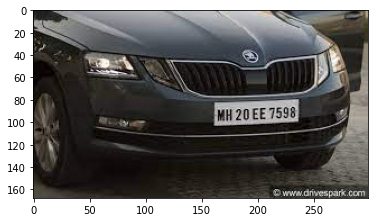

In [29]:
import cv2
img=cv2.imread('img2.jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Apply filter an dfind edges for localization

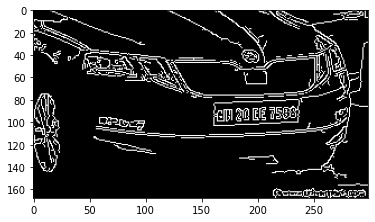

In [30]:
bfilter=cv2.bilateralFilter(gray,11,17,17)#Noise reduction
edged=cv2.Canny(bfilter,30,200)#edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [31]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [32]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [33]:
location

array([[[237,  81]],

       [[162,  83]],

       [[161, 103]],

       [[236, 100]]], dtype=int32)

In [34]:
mask=np.zeros(gray.shape,np.uint8)
new_img=cv2.drawContours(mask,[location],0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask)

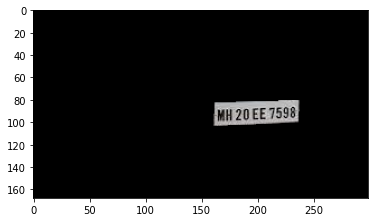

In [35]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [36]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_img=gray[x1:x2+1,y1:y2+1]

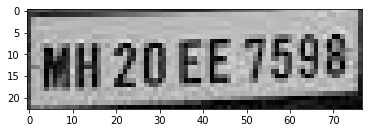

In [37]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

# Easy OCR to read text

In [38]:
reader=easyocr.Reader(['en'])
res=reader.readtext(cropped_img)
res

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 3], [77, 3], [77, 23], [0, 23]], 'MH2OEE 7598', 0.7109728470793286)]

# Render Result

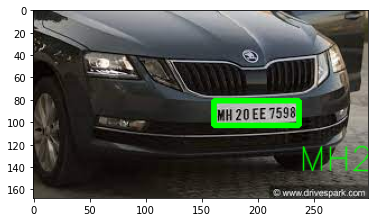

In [39]:
text=res[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res1=cv2.putText(img,text=text,org=(approx[0][0][0], approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=1,lineType=cv2.LINE_AA)
res1=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)

plt.imshow(cv2.cvtColor(res1,cv2.COLOR_BGR2RGB))

#plt.figure(figsize=(20,10))
#display()